In [2]:
import sys
import os
from sklearn.model_selection import train_test_split
import pandas as pd


dossier_modules = os.path.abspath("../Modele_Fr_V2")
sys.path.append(dossier_modules)

import entrainementDuModeleCamembert
import importEtInsert_data
import predictionModel
import equilibrer_les_donnees
import utility




# 1) Pré-traitement des données

In [ ]:
importEtInsert_data.DeElasticSearch_A_MongoDB(collection="exemple_data",requete= "/home/mariam/Documents/Projet_Categories/projet_categories/Modele_Fr_V2/requetes/requete_fr.json")

## 1.1) Mise au format multi-label

In [4]:
# Données brutes
df=importEtInsert_data.Importation_dataFrame(nom_collection="exemple_data")
df

,Text,textes,categories
0,Aménagement de locaux pour la mission locale e...,Avis No 21-78210\n\npublié le 11/06/2021\n\nDa...,[green_spaces]
1,École Jules Ferry / Frédéric Mistral Rénovatio...,Avis No 21-78246\n\npublié le 11/06/2021\r\n\r...,[green_spaces]
2,Réalisation des missions de contrôle du Servic...,Avis No 21-78608\n\npublié le 11/06/2021\r\n\r...,[sewerage]
3,Contrat de services professionnels en ingénier...,Consulter un avis \r\n\r\nNuméro : PRMI-093-10...,[civil_engineering]
4,Contrat de services professionnels en ingénier...,Consulter un avis \r\n\r\nNuméro : PRMI-093-10...,[civil_engineering]
...,...,...,...
705261,"47--HOSE ASSEMBLY,NONME","47--HOSE ASSEMBLY,NONME\n\nNotice ID : SPE7M32...",[rubber_or_plastic_products]
705262,Samoa Agriculture & Fisheries Productivity and...,Overview\n\nProject IDP165873\r\n\r\nProject T...,[office_and_it_equipment]
705263,Bangladesh Regional Waterway Transport Project...,Overview\n\nProject IDP154511\r\n\r\nProject T...,[medical_precision_optical_and_watchmaking_ins...
705264,Cambodia Higher Education Improvement Project ...,Overview\n\nProject IDP162971\r\n\r\nProject T...,"[radio_television_and_communication_equipment,..."


In [ ]:
importEtInsert_data.Creation_data_frame(collection_source= "exemple_data",collection_dest="exemple_data_frame")

## 1.2 Importer les données depuis MongoDB

In [5]:
# Données après la mise au format multi-label

df=importEtInsert_data.Importation_dataFrame(nom_collection="exemple_data_frame")
df

,Text,textes,building_works,studies_consulting_assistance,transport_and_related_services,financial_and_insurance_services,sewerage,car_industry_products_and_transport_equipment,real_estate_missions_and_inspections,it_services,...,silvicultural_products,drinking_water,agriculture,wholesale_and_retail,water_related_works,mining_and_minerals,paper_and_cardboard,recreational_cultural_and_sports_equipment,rubber_or_plastic_products,hydraulic_equipment
0,Aménagement de locaux pour la mission locale e...,Avis No 21-78210\n\npublié le 11/06/2021\n\nDa...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,École Jules Ferry / Frédéric Mistral Rénovatio...,Avis No 21-78246\n\npublié le 11/06/2021\r\n\r...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Réalisation des missions de contrôle du Servic...,Avis No 21-78608\n\npublié le 11/06/2021\r\n\r...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Contrat de services professionnels en ingénier...,Consulter un avis \r\n\r\nNuméro : PRMI-093-10...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Contrat de services professionnels en ingénier...,Consulter un avis \r\n\r\nNuméro : PRMI-093-10...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703513,Services de nettoyage de vitres Services de ne...,374615-2021\r\n\r\n23/07/2021 S141 \n\nFrance-...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703514,Services des postes et télécommunications Serv...,374621-2021\r\n\r\n23/07/2021 S141 \n\nFrance-...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703515,Services de nettoyage Services de nettoyage,374620-2021\r\n\r\n23/07/2021 S141 \n\nFrance-...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703516,"Services de technologies de l'information, con...",374618-2021\r\n\r\n23/07/2021 S141 \n\nFrance-...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 1.3) Analyse des données

In [3]:
utility.plot_distribution(df) 

In [4]:
utility.nb_exemple_categorie(df)

,Label,Nombre_de_exemples
0,Text,0
1,textes,0
2,building_works,130341
3,studies_consulting_assistance,105051
4,transport_and_related_services,70945
5,financial_and_insurance_services,28371
6,sewerage,36930
7,car_industry_products_and_transport_equipment,29595
8,real_estate_missions_and_inspections,26339
9,it_services,26965


# 2) Entraînement du modèle

## 2.1) Division des données

In [5]:

df_train, df_test = train_test_split(df, random_state=77, test_size=0.30, shuffle=True)
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.50, shuffle=True)
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (489925, 53), Test: (104984, 53), Valid: (104985, 53)


## 2.2) amélioration de l’équilibre des données

In [13]:
equilibrer_les_donnees.Oversampling(data=df_train,count=3000,collection="exemple_oversampling")

##################fire445 ###########################
##################fire444 ###########################
##################fire443 ###########################
##################fire442 ###########################
##################fire441 ###########################
##################fire440 ###########################
##################fire439 ###########################
##################fire438 ###########################
##################fire437 ###########################
##################fire436 ###########################
##################fire435 ###########################
##################fire434 ###########################
##################fire433 ###########################
##################fire432 ###########################
##################fire431 ###########################
##################fire430 ###########################
##################fire429 ###########################
##################fire428 ###########################
##################fire427 ##

In [7]:
df_undersampling=equilibrer_les_donnees.Undersampling(df_train,4000,["mining_and_minerals","paper_and_cardboard",
                                                    "recreational_cultural_and_sports_equipment","rubber_or_plastic_products","hydraulic_equipment","roofing",])

In [14]:
df_oversampling=importEtInsert_data.Importation_dataFrame("exemple_oversampling")

In [9]:
# train avant l'amélioration de l'équilibre 
utility.plot_distribution(df_train) 

In [16]:
df_train=pd.concat([df_oversampling,df_undersampling])

In [17]:
# train après l'amélioration de l'équilibre 
utility.plot_distribution(df_train) 

## 2.3) Stockage des ensembles de données

In [18]:
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (171437, 53), Test: (104984, 53), Valid: (104985, 53)


In [21]:
importEtInsert_data.insertion_MDB("exemple_train",df_train)
importEtInsert_data.insertion_MDB("exemple_test",df_test)
importEtInsert_data.insertion_MDB("exemple_valid",df_valid)

## 2.4) Entraînement du modèle

In [23]:

path="/home/mariam/Documents/Projet_Categories/projet_categories/Feuille_de_route/BestModel/model_V.pth"
    
entrainementDuModeleCamembert.main(lien_collection_train="exemple_train",lien_collection_valid="exemple_valid",path=path)


 ################################# Importation des données ##################################### 

Train: (171437, 53), Valid: (104985, 53)

 ################################### Entrainement du modèle ############################## 



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1/7


100%|██████████| 3281/3281 [11:18<00:00,  4.84it/s]



Temps d'exécution: 67.29600006739298 min

train_loss=0.1248, val_loss=0.0683 train_acc=0.9742, val_acc=0.9777
Epoch 2/7


100%|██████████| 3281/3281 [10:41<00:00,  5.11it/s]



Temps d'exécution: 66.97188957134883 min

train_loss=0.0443, val_loss=0.0311 train_acc=0.9860, val_acc=0.9917
Epoch 3/7


100%|██████████| 3281/3281 [10:35<00:00,  5.16it/s]



Temps d'exécution: 62.94432546297709 min

train_loss=0.0238, val_loss=0.0240 train_acc=0.9935, val_acc=0.9931
Epoch 4/7


100%|██████████| 3281/3281 [10:36<00:00,  5.16it/s]



Temps d'exécution: 62.96332732041677 min

train_loss=0.0178, val_loss=0.0215 train_acc=0.9949, val_acc=0.9936
Epoch 5/7


100%|██████████| 3281/3281 [10:35<00:00,  5.16it/s]



Temps d'exécution: 62.95932858387629 min

train_loss=0.0144, val_loss=0.0203 train_acc=0.9958, val_acc=0.9939
Epoch 6/7


100%|██████████| 3281/3281 [10:36<00:00,  5.16it/s]



Temps d'exécution: 62.96534649928411 min

train_loss=0.0121, val_loss=0.0197 train_acc=0.9964, val_acc=0.9943
Epoch 7/7


100%|██████████| 3281/3281 [10:36<00:00,  5.16it/s]



Temps d'exécution: 62.97741977771123 min

train_loss=0.0103, val_loss=0.0198 train_acc=0.9970, val_acc=0.9945


# 3) Evaluation du modèle


 ################################# Importation des données ##################################### 



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|██████████| 3281/3281 [11:36<00:00,  4.71it/s]


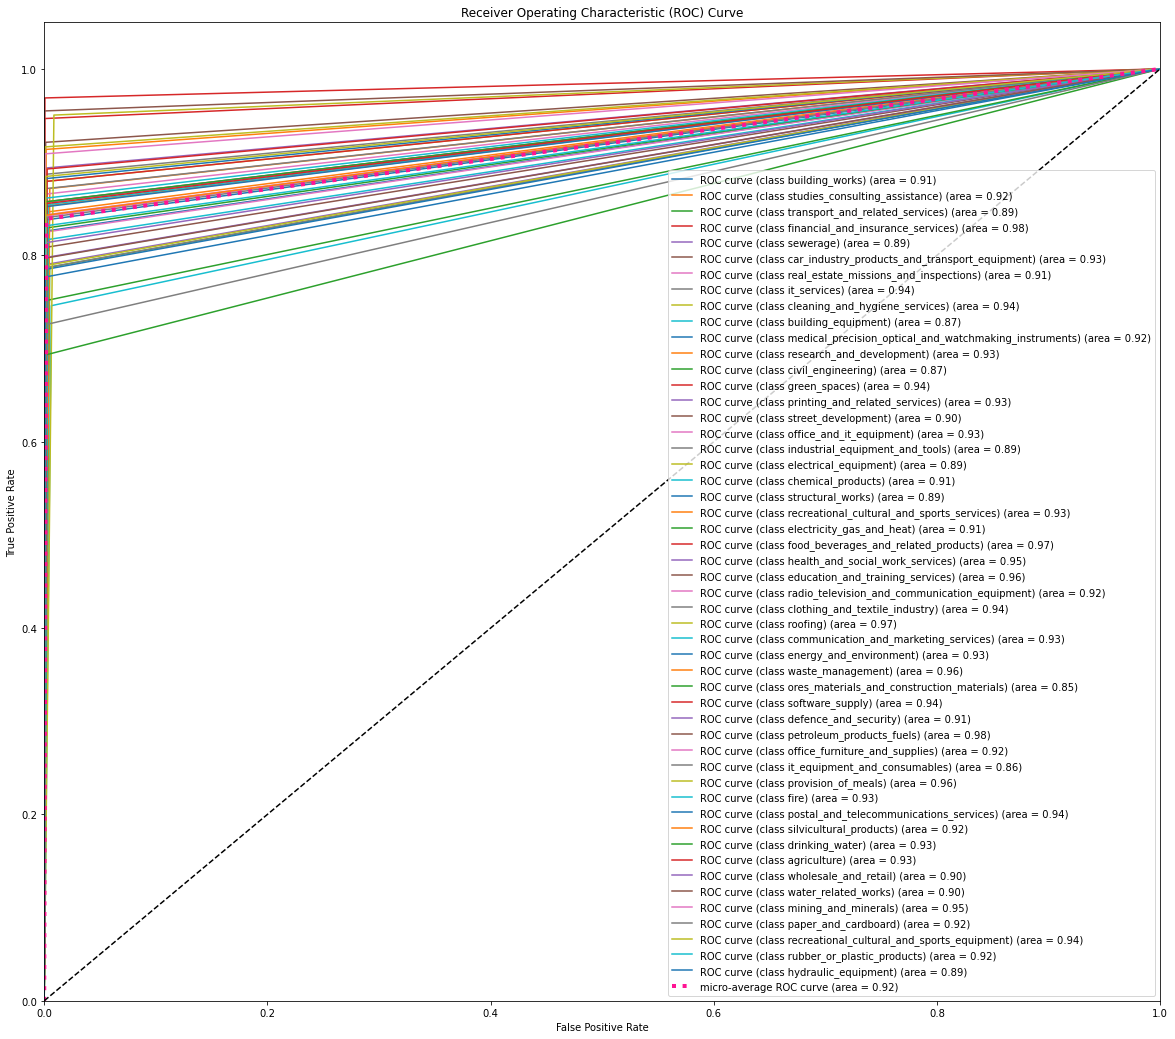

                                                       precision    recall  f1-score   support

                                       building_works       0.99      0.83      0.90     19577
                        studies_consulting_assistance       0.99      0.85      0.91     15804
                       transport_and_related_services       0.95      0.79      0.86     10796
                     financial_and_insurance_services       0.98      0.97      0.98      4174
                                             sewerage       0.95      0.79      0.86      5470
        car_industry_products_and_transport_equipment       0.95      0.86      0.90      4590
                 real_estate_missions_and_inspections       0.93      0.83      0.87      3917
                                          it_services       0.94      0.89      0.91      4072
                        cleaning_and_hygiene_services       0.96      0.88      0.92      3428
                                   building_equip

/home/mariam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [24]:
import evaluation_modele

evaluation_modele.main(lien_collection_test="exemple_test",path=path)

# 4) Sauvegarde du modèle